In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read

In [2]:


file_name = "jackhammer.wav"

Fs, data = read(file_name)
print(f"Sampling rate: {Fs} Hz")
print(f"Data type: {data.dtype}")
print(f"Data shape: {data.shape}")
print(f"Data: {data[:10]}")

#### Data is stereo so it has two channels
data_left_ch = data[:, 0]
data_right_ch = data[:, 1]

#### Create time array and plot the data
Ts = 1 / Fs
N = len(data_left_ch)
time = np.arange(0, N) * Ts

Sampling rate: 44100 Hz
Data type: int16
Data shape: (147590, 2)
Data: [[ -78  -76]
 [-532 -532]
 [-935 -935]
 [-742 -743]
 [-175 -175]
 [-277 -278]
 [-814 -815]
 [-872 -873]
 [-588 -587]
 [-419 -420]]


/var/folders/sm/bpqf8wpj6478c8rtz31k076r0000gn/T/ipykernel_72839/2001165126.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, data = read(file_name)


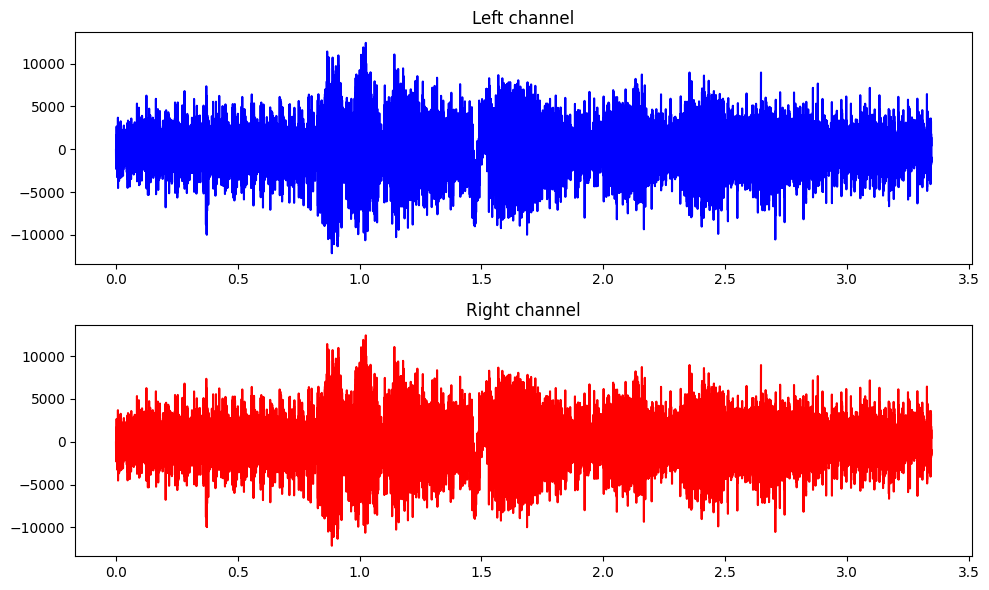

In [3]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, data_left_ch, "b")
plt.title("Left channel")

plt.subplot(2, 1, 2)
plt.plot(time, data_right_ch, "r")
plt.title("Right channel")

plt.tight_layout()
plt.show()


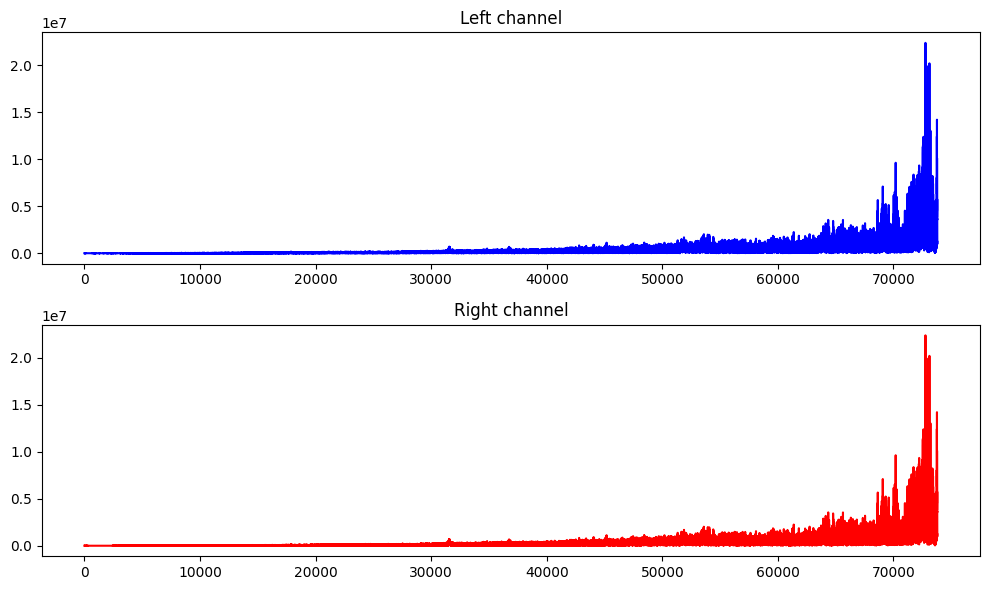

In [4]:

#### Plot the data in the frequency domain
frequencies_left = np.fft.fft(data_left_ch)
frequencies_right = np.fft.fft(data_right_ch)

N = len(frequencies_left)
### Center the frequencies
frequencies_left = np.fft.fftshift(frequencies_left)
frequencies_left = frequencies_left[: N // 2]

frequencies_right = np.fft.fftshift(frequencies_right)
frequencies_right = frequencies_right[: N // 2]

### plot the data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.abs(frequencies_left), "b")
plt.title("Left channel")

plt.subplot(2, 1, 2)
plt.plot(np.abs(frequencies_right), "r")
plt.title("Right channel")

plt.tight_layout()
plt.show()

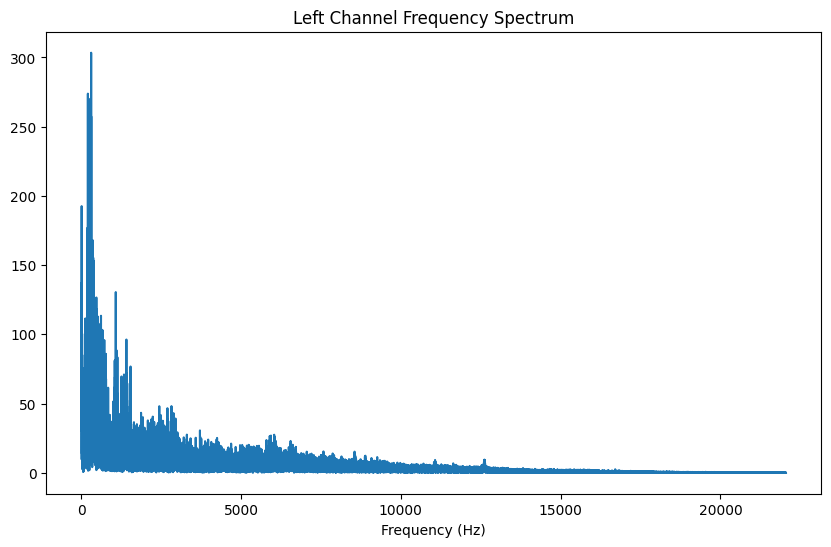

In [5]:
# Compute FFT for left channel (repeat similarly for right)
N = len(data_left_ch)
frequencies_left = np.fft.fft(data_left_ch)
freq_axis = np.fft.fftfreq(N, Ts)[:N//2]  # Frequencies from 0 to Fs/2
magnitude_left = np.abs(frequencies_left[:N//2]) * 2 / N  # Normalized magnitude

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freq_axis, magnitude_left)
plt.title("Left Channel Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.show()

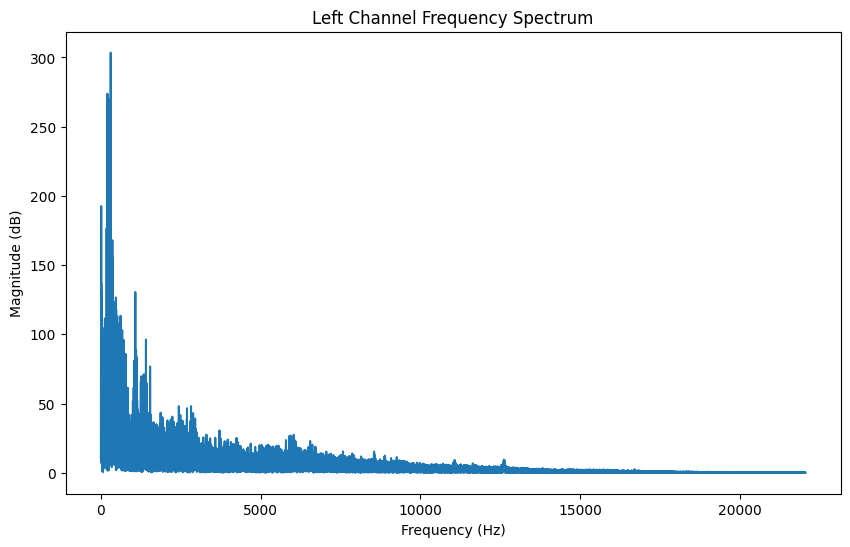

In [ ]:

# Compute FFT for left channel (repeat similarly for right)
N = len(data_right_ch)
frequencies_right = np.fft.fft(data_left_ch)
freq_axis = np.fft.fftfreq(N, Ts)[:N//2]  # Frequencies from 0 to Fs/2
magnitude_right = np.abs(frequencies_right[:N//2]) * 2 / N  # Normalized magnitude

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freq_axis, magnitude_right)
plt.title("Left Channel Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.show()